#### **Ordinary Least Squares (OLS) is a linear regression method that minimizes the sum of squared differences between the observed targets and the predicted targets.**
---

# Ordinary Least Squares (OLS) 回歸介紹

**Ordinary Least Squares (OLS)** 是線性回歸中最常用的方法，目的是找出一條最佳直線，使預測值與實際值之間的**誤差平方和（Sum of Squared Errors, SSE）最小**。

---
線性模型假設為：
$$y = X\beta + \varepsilon$$

給定資料集：
<ul>
  <li>\( y \in \mathbb{R}^n \)：目標變數（response vector）</li>
  <li>\( X \in \mathbb{R}^{n \times p} \)：解釋變數矩陣（design matrix）</li>
  <li>\( \beta \in \mathbb{R}^p \)：模型參數</li>
  <li>\( \varepsilon \in \mathbb{R}^n \)：誤差項</li>
</ul>


---

最佳化目標，OLS 要最小化的損失函數（誤差平方和）為：$ \min_{\beta} \; \| y - X\beta \|^2 $

---

導出解（Closed-form solution），將損失函數對 $\beta$ 微分並設為 0，得到 OLS 的封閉解為：$ \hat{\beta} = (X^\top X)^{-1} X^\top y $

> **條件**：$X^\top X$ 必須為可逆矩陣（通常需滿足 X 無完全共線性）

---

### 應用場景

OLS 廣泛應用於：
- 預測與解釋變數間線性關係
- 特徵選擇與初步建模
- 經濟學、社會科學、機器學習中的基礎模型

---

### 參考

- Hastie, Tibshirani, and Friedman, *The Elements of Statistical Learning*
- ISLR, *An Introduction to Statistical Learning*



#### Let's start by fitting a linear regression model using OLS.

In [2]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
X = [[0, 0], [1, 1], [2, 2]]
y = [0, 1, 2]
reg.fit(X, y)

print(reg.coef_)

[0.5 0.5]


*  We import the linear_model module from scikit-learn.
*  We create an instance of LinearRegression.
*  We use the fit method to fit the model to the training data.
*  We print the coefficients of the linear model.

In [ ]:
# 1. 安裝 kaggle（若還沒裝）
#!pip install kaggle

# 2. 上傳 kaggle.json（手動或程式處理）
# from google.colab import files
# files.upload()  # 上傳 kaggle.json

# 3. 移動到 ~/.kaggle 並設定權限
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# 4. 下載資料集
# !kaggle datasets download -d hellbuoy/car-price-prediction

# 5. 解壓縮
# !unzip car-price-prediction.zip


R² 分數：0.9097
RMSE：2669.93

特徵影響力（依係數絕對值排序）:
                  Feature  Coefficient
23    enginelocation_rear  8055.620180
34  cylindernumber_twelve -6143.077377
44           CarBrand_bmw  5392.010857
47         CarBrand_dodge -5179.311730
53    CarBrand_mitsubishi -5176.485800
56      CarBrand_plymouth -5105.084481
60        CarBrand_subaru -5042.595540
24       enginetype_dohcv -4933.558543
46     CarBrand_chevrolet -4383.734561
7               boreratio -4157.029889


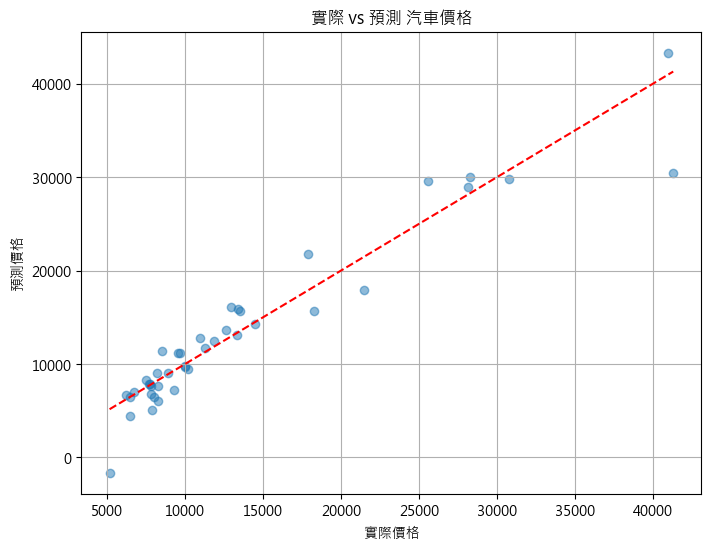

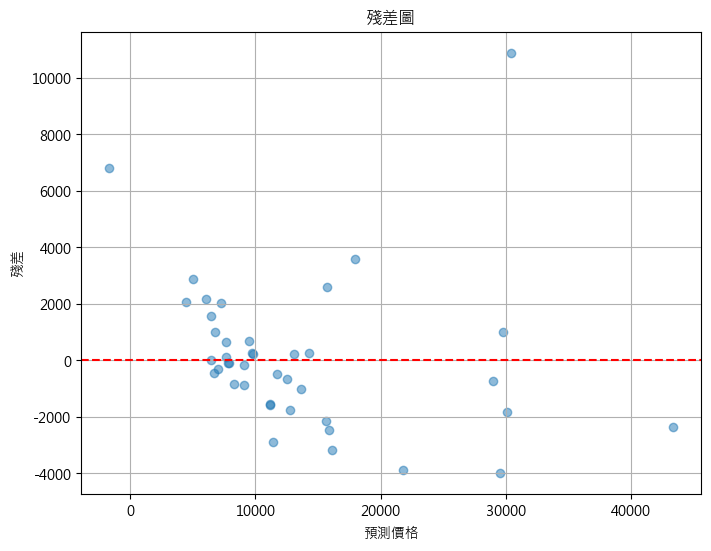

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib
matplotlib.rcParams['font.family'] = 'Microsoft JhengHei'  # Windows 中文字體
matplotlib.rcParams['axes.unicode_minus'] = False  # 避免負號顯示錯誤

# 1. 讀取資料
df = pd.read_csv("CarPrice_Assignment.csv")

# 2. 前處理：處理 car brand，拆解 'CarName'
df['CarBrand'] = df['CarName'].apply(lambda x: x.split()[0].lower())
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

# 矯正一些品牌名稱的錯字（這是原資料常見錯誤）
brand_corrections = {
    "vw": "volkswagen", "vokswagen": "volkswagen", "porcshce": "porsche",
    "toyouta": "toyota", "maxda": "mazda", "nissan": "nissan"
}
df['CarBrand'] = df['CarBrand'].replace(brand_corrections)

# 3. One-hot encoding：針對類別變數
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody',
                    'drivewheel', 'enginelocation', 'enginetype',
                    'cylindernumber', 'fuelsystem', 'CarBrand']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. 分離特徵與目標變數
X = df.drop("price", axis=1)
y = df["price"]

# 5. 分割訓練與測試資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. 建立並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 7. 預測與評估
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² 分數：{r2:.4f}")
print(f"RMSE：{rmse:.2f}")

# 8. 顯示每個特徵的係數（依影響力排序）
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\n特徵影響力（依係數絕對值排序）:")
print(coef_df.head(10))

# 9. 可視化：實際值 vs 預測值
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("實際價格")
plt.ylabel("預測價格")
plt.title("實際 vs 預測 汽車價格")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

# 10. 可視化：殘差圖
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("預測價格")
plt.ylabel("殘差")
plt.title("殘差圖")
plt.grid(True)
plt.show()


---

## **示範 Ordinary Least Squares (OLS)**

上述範例中使用的 `LinearRegression()`，預設採用 **Ordinary Least Squares** 方法，透過最小化殘差平方和來求解回歸係數。

$$
\hat{\beta} = \arg\min_{\beta}\sum_{i=1}^n (y_i - \mathbf{x}_i^\top \beta)^2
$$

### **關鍵點：**
1. **目標函數**：最小化
   $$
   J(\beta) = \sum_{i=1}^n (y_i - \mathbf{x}_i^\top \beta)^2
   $$
2. **解析解**：
   $$
   \hat{\beta} = (X^\top X)^{-1} X^\top y
   $$
3. **scikit-learn 的實作**：`LinearRegression()` 直接計算上述解析解，並回傳 `.coef_`（對應各特徵的 β）和 `.intercept_`（截距）。

---

透過上述數學表示與 scikit-learn 範例，即完整示範了 **OLS** 的原理與應用。


截距 (intercept): 4.0573
係數 (coefficients): [ 2.89342511 -1.99260623]
R² 分數: 0.9521
MSE: 0.2115
RMSE: 0.4599


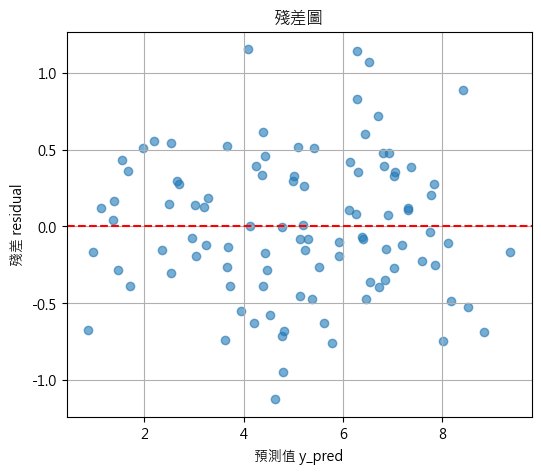

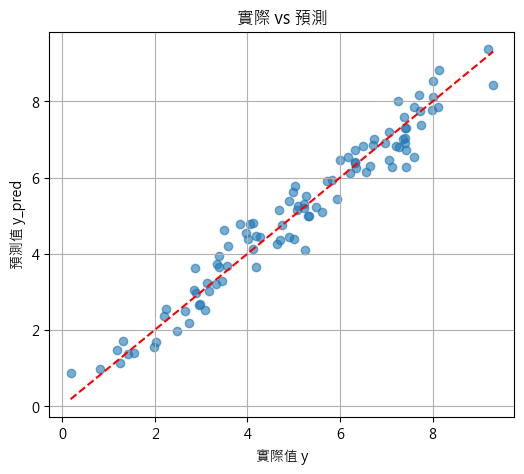

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. 模擬資料：y = 4 + 3*x1 - 2*x2 + 噪音
# -----------------------------
np.random.seed(0)
n_samples = 100
X = 2 * np.random.rand(n_samples, 2)
true_coef = np.array([3.0, -2.0])
noise = np.random.randn(n_samples) * 0.5
y = 4 + X @ true_coef + noise

# -----------------------------
# 2. 線性回歸模型手刻
# -----------------------------
class MyLinearRegression:
    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # 增加 bias 項
        self.X_b = X_b
        self.theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # OLS 解
        return self

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.theta

    def coef_(self):
        return self.theta[1:]

    def intercept_(self):
        return self.theta[0]

# -----------------------------
# 3. 模型訓練與預測
# -----------------------------
model = MyLinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# -----------------------------
# 4. 評估指標：MSE、RMSE、R²
# -----------------------------
mse = np.mean((y - y_pred) ** 2)
rmse = np.sqrt(mse)
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_res = np.sum((y - y_pred) ** 2)
r2 = 1 - ss_res / ss_total

print(f"截距 (intercept): {model.intercept_():.4f}")
print(f"係數 (coefficients): {model.coef_()}")
print(f"R² 分數: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# -----------------------------
# 5. 殘差圖與實際 vs 預測
# -----------------------------
residuals = y - y_pred

plt.figure(figsize=(6, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("預測值 y_pred")
plt.ylabel("殘差 residual")
plt.title("殘差圖")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
plt.xlabel("實際值 y")
plt.ylabel("預測值 y_pred")
plt.title("實際 vs 預測")
plt.grid(True)
plt.show()


# Ridge Regression

Ridge regression is a linear regression method that adds a penalty term to the ordinary least squares objective function. This penalty term helps to reduce overfitting by shrinking the coefficients towards zero. The complexity of the model can be controlled by the regularization parameter.

Let's fit a ridge regression model.

# Ridge Regression（脊回歸）介紹

**Ridge Regression** 是一種改進的線性回歸方法，在 Ordinary Least Squares (OLS) 的目標函數中加入懲罰項（penalty term），用來抑制模型過度擬合（overfitting）。它透過將模型係數向 0 收縮，達到簡化模型與提高泛化能力的目的。

---

## 目標函數（Objective Function）

Ridge Regression 的最小化目標為：

$$\min_{\beta} \; \| y - X\beta \|^2 + \lambda \| \beta \|^2$$

其中：

- $y$ 是響應變數（response variable）
- $X$ 是特徵矩陣（feature matrix）
- $\beta$ 是模型參數（regression coefficients）
- $\lambda$ 是正則化參數（regularization parameter），控制懲罰項的強度
- $\| \beta \|^2$ 是 L2 範數平方（即 $\sum \beta_i^2$）

---

## 模型特性

- 當 $\lambda = 0$，Ridge Regression 等同於 OLS。
- 隨著 $\lambda$ 增加，模型係數會越接近 0。
- 能有效處理共線性問題，並防止模型對訓練資料過度擬合。

---

## 與 OLS 的比較

| 項目         | OLS 回歸           | Ridge 回歸                      |
|--------------|--------------------|---------------------------------|
| 目標         | 最小化殘差平方和    | 殘差平方和 + 正則化項          |
| 過擬合控制    | 無                  | 有，透過 $\lambda$ 控制        |
| 解的形式      | $(X^\top X)^{-1} X^\top y$ | $(X^\top X + \lambda I)^{-1} X^\top y$ |

---

## 應用場景

- 高維資料中（特徵數多於樣本數）
- 特徵之間有高度共線性
- 希望模型更穩定並具備更強的泛化能力

---



In [3]:
reg = linear_model.Ridge(alpha=0.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, 0.1, 1])

print(reg.coef_)

[0.34545455 0.34545455]


* We create an instance of Ridge with the regularization parameter alpha set to 0.5.
* We use the fit method to fit the model to the training data.
* We print the coefficients of the ridge regression model.
* Continue

---

# Lasso
Lasso is a linear regression method that adds a penalty term to the ordinary least squares objective function. The penalty term has the effect of setting some coefficients to exactly zero, thus performing feature selection. Lasso can be used for sparse model estimation.

# Lasso Regression（套索回歸）介紹

**Lasso Regression** 是一種線性回歸方法，它在 Ordinary Least Squares (OLS) 的目標函數中加入 L1 正則化（L1 penalty）。這種懲罰會導致部分係數縮小至「**完全為 0**」，因此具有 **特徵選擇（feature selection）** 的能力。

---

## 目標函數（Objective Function）

Lasso 的優化目標為：

$$ \min_{\beta} \; \| y - X\beta \|^2 + \lambda \| \beta \|_1 $$

其中：

- $y$：響應變數（response variable）
- $X$：特徵矩陣（feature matrix）
- $\beta$：回歸係數（regression coefficients）
- $\lambda$：正則化參數（regularization parameter）
- $\| \beta \|_1 = \sum |\beta_i|$：L1 範數（絕對值之和）

---

## 特性與優點

- 可以將不重要的特徵係數縮為 **0**，達到變數選擇效果
- 在特徵數量遠大於樣本數的情況下非常有效
- 適合建立稀疏模型（sparse model）

---

## 與 Ridge Regression 比較

| 項目         | Ridge 回歸         | Lasso 回歸                     |
|--------------|--------------------|--------------------------------|
| 懲罰類型      | L2 範數             | L1 範數                         |
| 係數縮小      | 係數趨近於 0         | 係數可以變為 0（特徵選擇）      |
| 適用情境      | 共線性處理          | 稀疏特徵建模／特徵選擇          |

---

## 準備建立 Lasso 模型

我們接下來可以嘗試使用 Python 建立一個 Lasso 回歸模型。


In [4]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

# 建立模擬資料
X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)

# 建立並訓練 Lasso 模型
model = Lasso(alpha=0.1)
model.fit(X, y)

# 印出模型係數
print(model.coef_)

[ 6.45386948 94.67737779 40.55794675  0.         -0.         -0.
 10.98839003 95.40225582 80.67610577 34.83198456 -0.          0.
  0.         -0.         -0.         29.82848069  7.12581798 -0.
  0.         52.17111821]


In [5]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

print(reg.coef_)

[0.6 0. ]


* We create an instance of Lasso with the regularization parameter alpha set to 0.1.
* We use the fit method to fit the model to the training data.
* We print the coefficients of the lasso model.

---

# Logistic Regression
Logistic regression is a classification method that estimates the probabilities of the possible outcomes using a logistic function. It is commonly used for binary classification tasks. Logistic regression can also be extended to handle multi-class classification problems.

# Logistic Regression（邏輯回歸）介紹

**Logistic Regression** 是一種用於分類任務的統計方法，透過 logistic 函數（S 型函數）將線性回歸輸出轉換為介於 0 與 1 之間的機率值。它最常用於 **二元分類（binary classification）** 問題，例如判斷是否會發生某事件。

---

## 模型概念

Logistic 回歸建模的是事件發生的 **機率**，模型形式為：

$$
P(y = 1 \mid X) = \frac{1}{1 + e^{-(X\beta)}}
$$

其中：

- $P(y = 1 \mid X)$ 是在給定輸入 $X$ 條件下，$y$ 為 1 的機率  
- $X$ 是特徵向量，$\beta$ 是參數向量  
- $e$ 是自然對數的底數  
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ 為 sigmoid 函數

---

## 特性與擴充

- 模型輸出為機率，可根據閾值（通常為 0.5）轉換為類別預測
- 可延伸為多分類模型（multinomial logistic regression / softmax regression）
- 可加入 L1 或 L2 正則化項進行模型控制

---

## 與線性回歸的差異

| 項目             | 線性回歸               | 邏輯回歸                 |
|------------------|------------------------|----------------------------|
| 輸出範圍         | 任意實數               | 機率值（0 到 1）            |
| 問題類型         | 預測連續值             | 分類問題（機率/類別）       |
| 損失函數         | 殘差平方和（MSE）       | 邏輯損失（log loss / cross entropy） |

---

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 建立模擬資料（binary classification）
X, y = make_classification(n_samples=200, n_features=5, random_state=42)

# 分割訓練與測試資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 建立並訓練模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 預測與評估
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8666666666666667


In [7]:
clf = linear_model.LogisticRegression(random_state=0).fit(X, y)
print(clf.coef_)

[[ 0.39758121 -0.50380348  0.07252856  1.87977126  0.08573005]]


* We create an instance of LogisticRegression with the random_state parameter set to 0.
* We use the fit method to fit the model to the training data.
* We print the coefficients of the logistic regression model.

# Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent (SGD) is a simple yet efficient approach for training linear models. It is particularly useful when the number of samples and features is very large. SGD updates the model parameters using a small subset of the training data at each iteration, which makes it suitable for online learning and out-of-core learning.

# Stochastic Gradient Descent (SGD) 介紹

**Stochastic Gradient Descent (SGD)** 是一種簡單而高效的模型訓練方法，特別適用於樣本數或特徵數非常龐大的情況。與傳統的批次梯度下降（Batch Gradient Descent）不同，SGD 每次僅使用一筆或少量資料來更新參數，這使得它特別適合：

- 線上學習（online learning）
- 流式資料處理（streaming data）
- 超大資料集（out-of-core learning）

---

## 基本概念

對於一個參數為 $\theta$ 的模型，若損失函數為 $L(\theta)$，則傳統梯度下降的更新公式為：

$$
\theta := \theta - \eta \cdot \nabla L(\theta)
$$

而 **SGD** 則是使用隨機選取的單筆資料 $(x_i, y_i)$ 來近似損失：

$$
\theta := \theta - \eta \cdot \nabla L_i(\theta)
$$

其中：

- $\eta$ 是學習率（learning rate）
- $L_i(\theta)$ 是對樣本 $i$ 的損失

這樣的更新速度快、記憶體需求低，但會帶來較高的參數震盪（不穩定性），通常可透過 mini-batch、動態學習率或動量法改善。

---

## 優點與特性

- **快速更新**：適合即時學習與模型微調
- **低記憶體使用**：每次只載入少量資料
- **可持續訓練**：支援 streaming / online learning 模式
- **收斂較不穩定**：需調整學習率與其他超參數

---

## 使用 SGD 訓練 Logistic Regression 模型

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 建立模擬資料
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# 切分資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 建立並訓練 SGD 分類器（使用邏輯斯回歸損失）
model = SGDClassifier(loss="log_loss", max_iter=1000, learning_rate='optimal', random_state=42)
model.fit(X_train, y_train)

# 預測與評估
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8066666666666666


In [9]:
clf = linear_model.SGDClassifier(loss="log_loss", max_iter=1000)
clf.fit(X, y)

print(clf.coef_)

[[-2.09193066e-03 -6.49722947e-01  4.74693545e-01 -1.95411927e-01
   2.60577151e-01  2.11003462e+00 -4.11074652e-01 -4.56211669e-01
  -1.10235638e-01  2.78221850e-01  6.87825120e-01  4.93415646e-01
  -2.27537505e-02 -1.74697843e-01 -6.70348035e-01 -2.40114947e-01
   3.83780670e-01  8.32484582e-02 -9.99139278e-01 -5.47660765e-01]]


* We create an instance of SGDClassifier with the loss parameter set to "log_loss" to perform logistic regression.
* We use the fit method to fit the model to the training data.
* We print the coefficients of the logistic regression model obtained using SGD.

# Perceptron
The Perceptron is a simple linear classification algorithm suitable for large-scale learning. It updates its model only on mistakes, making it faster to train than the stochastic gradient descent (SGD) with hinge loss. The resulting models are also sparser.

基本觀念：
Perceptron 是一種最早期的「線性分類器」，專門用來將資料分成兩類（例如：貓 or 狗）。

原理如下：
- 給定一組輸入特徵 x = [x₁, x₂, ..., xₙ]
- 權重向量 w = [w₁, w₂, ..., wₙ]
- 計算：加權總和 `z = w · x + b`
- 判斷：
   如果 z ≥ 0，預測為正類 (+1)
   如果 z <  0，預測為負類 (-1)

更新規則（只有預測錯誤才更新）：
- 如果預測錯了（即 y ≠ 預測值）：
    w ← w + y * x
    b ← b + y

特點：
- 僅在「犯錯時」才更新權重，節省訓練時間。
- 與 SVM 不同，它不會使用 loss function，而是直接調整權重。
- 若資料可線性分割，Perceptron 保證收斂。

適用場景：
- 快速分類大規模資料
- 線性可分的問題
- 當不需要概率輸出或高準確率時的 baseline 模型


In [10]:
clf = linear_model.Perceptron(alpha=0.1)
clf.fit(X, y)

print(clf.coef_)

[[ 2.85010542 -3.01319515 -4.29331803  1.31284096 -2.94543946  9.46677496
  -2.10277224 -3.97991295  3.28738284  1.05824817  2.54526096  2.36440727
   2.77214445 -0.85109982 -2.76774421  3.23864082  1.47327544 -1.9473374
  -4.52927096  5.41081965]]


* We create an instance of Perceptron with the regularization parameter alpha set to 0.1.
* We use the fit method to fit the model to the training data.
* We print the coefficients of the perceptron model.

### We explored linear models in scikit-learn. 
#### We learned about 
* ordinary least squares
* ridge regression
* lasso
* logistic regression
* stochastic gradient descent
* perceptron
#### These models can be used for both regression and classification tasks.
We also saw how to fit these models using various algorithms and techniques such as online learning and feature selection.

### Linear Models in Scikit-learn

我們探索了 **scikit-learn** 中的線性模型，包括各種適用於迴歸與分類的演算法。

#### 學到的模型：

- **Ordinary Least Squares (OLS)**  
  最基本的線性回歸模型，最小化預測值與實際值的平方差。

- **Ridge Regression**  
  加入 L2 正則化，避免 overfitting。

- **Lasso**  
  加入 L1 正則化，具有特徵選擇能力，結果會更稀疏。

- **Logistic Regression**  
  用於二分類問題，產生機率型預測值。

- **Stochastic Gradient Descent (SGD)**  
  適用於大規模資料集的線性模型訓練，逐一更新權重。

- **Perceptron**  
  經典線性分類器，只在錯誤預測時更新模型，速度快、模型稀疏。

#### 技術與技巧：

- **Online Learning**（線上學習）  
  使用一筆筆資料逐步更新模型，適合大量或即時資料。

- **Feature Selection**（特徵選擇）  
  像 Lasso 這類模型會自動挑出有用的特徵，提高模型效率與解釋力。

#### 適用於：

- 回歸任務（Regression）
- 分類任務（Classification）

---

### 📊 線性模型總整理比較表

| 模型                   | 問題類型     | 正則化    | 是否稀疏 | 訓練方式           | 適用情境                         |
|------------------------|--------------|-----------|----------|--------------------|----------------------------------|
| OLS（最小平方法）      | 迴歸         | ❌ 無      | ❌ 否     | 最小化平方誤差       | 基本線性回歸、特徵不多時使用     |
| Ridge Regression       | 迴歸         | ✅ L2      | ❌ 否     | 加入L2懲罰項        | 避免過擬合、特徵有共線性時       |
| Lasso Regression       | 迴歸         | ✅ L1      | ✅ 是     | 加入L1懲罰項        | 特徵選擇、自動忽略不重要特徵     |
| Logistic Regression    | 分類（二元） | ✅ L2/L1可選 | ✅/❌ 視正則化而定 | 最大化對數似然（或最小損失） | 預測機率、二分類問題             |
| SGD（隨機梯度下降）    | 回歸 / 分類  | ✅ 可自訂  | ✅ 是     | 一筆筆資料更新       | 大數據集、線上學習              |
| Perceptron             | 分類（二元） | ❌ 無      | ✅ 是     | 只在犯錯時更新       | 線性可分問題、快速初步分類       |

📌 備註：
- ✅ = 有支援 / 具備該特性
- ❌ = 無支援 / 不具備該特性
- 稀疏（Sparse）指的是結果中只有少數非零特徵 → 模型較易解釋，也省記憶體

